# Human Activity Recognition

# Quick overview of the dataset :

* Accelerometer and Gyroscope readings are taken from 30 volunteers(referred as subjects) while performing the following 6 Activities.

    1. Walking     
    2. WalkingUpstairs 
    3. WalkingDownstairs 
    4. Standing 
    5. Sitting 
    6. Lying.


* Readings are divided into a window of 2.56 seconds with 50% overlapping. 

* Accelerometer readings are divided into gravity acceleration and body acceleration readings,
  which has x,y and z components each.

* Gyroscope readings are the measure of angular velocities which has x,y and z components.

* Jerk signals are calculated for BodyAcceleration readings.

* Fourier Transforms are made on the above time readings to obtain frequency readings.

* Now, on all the base signal readings., mean, max, mad, sma, arcoefficient, engerybands,entropy etc., are calculated for each window.

* We get a feature vector of 561 features and these features are given in the dataset.

* Each window of readings is a datapoint of 561 features.

## Problem Framework

* 30 subjects(volunteers) data is randomly split to 70%(21) test and 30%(7) train data.
* Each datapoint corresponds one of the 6 Activities.


## Problem Statement

 + Given a new datapoint we have to predict the Activity

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## Load dataset

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
# print first 2 rows of train data
train.head(2)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING


In [4]:
# print first 2 rows of test data
test.head(2)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.16292,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.01750,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING


In [5]:
print(train.shape)
print(test.shape)

(7352, 563)
(2947, 563)


# Data Cleaning

### 1. Changing feature names

We always need to special characters from column names.

In [6]:
columns = train.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

test.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

### 2. Check for Duplicates

In [7]:
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(test.duplicated())))

No of duplicates in train: 0
No of duplicates in test : 0


There are no duplicate rows.

### 3. Checking for NaN/null values

In [8]:
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


There are no null values.

### 4. Check for data imbalance

### i) Check number of activites per subject / person.

In [9]:
# import required liabraries for plotting 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

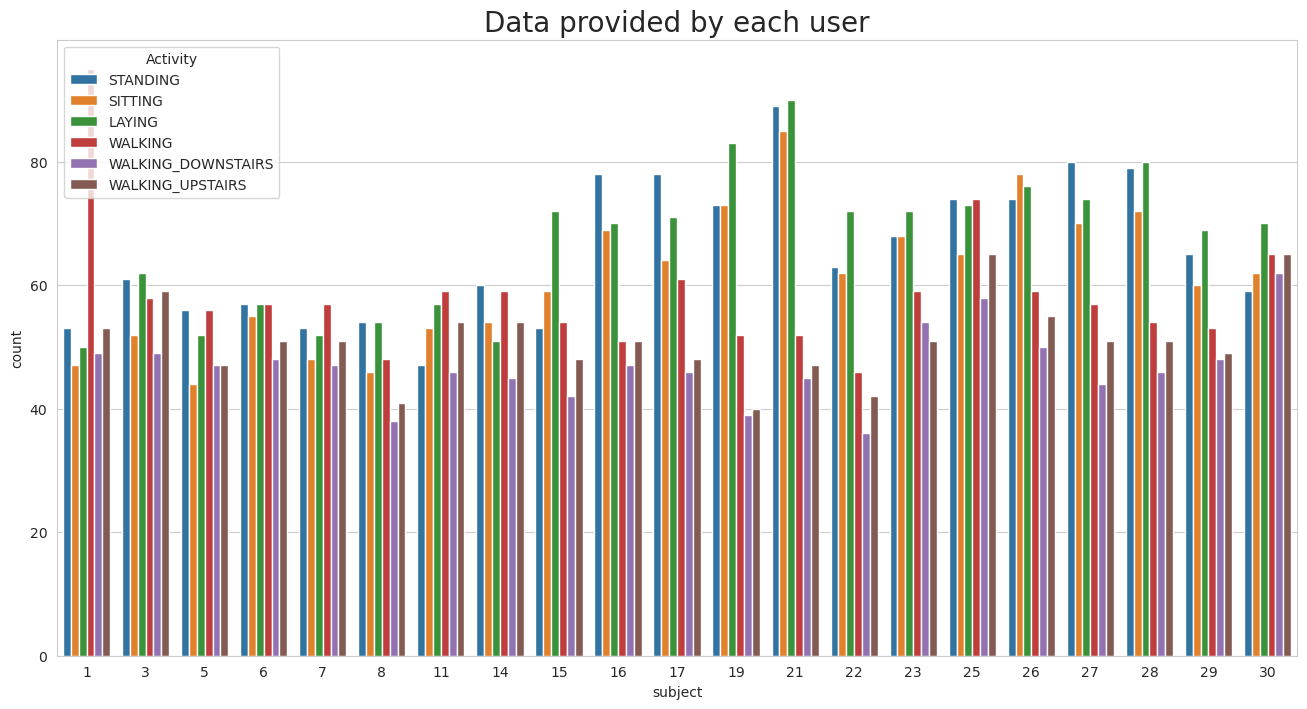

In [10]:
plt.figure(figsize=(16,8)) # set fig size
plt.title('Data provided by each user', fontsize=20) # give title
sns.countplot(x='subject',hue='Activity', data = train) # count plot gives count of each activities per subject
plt.show()

### Observations:

1. Each activities are almost same for all volunteers. 

### ii) Check number of data points per class

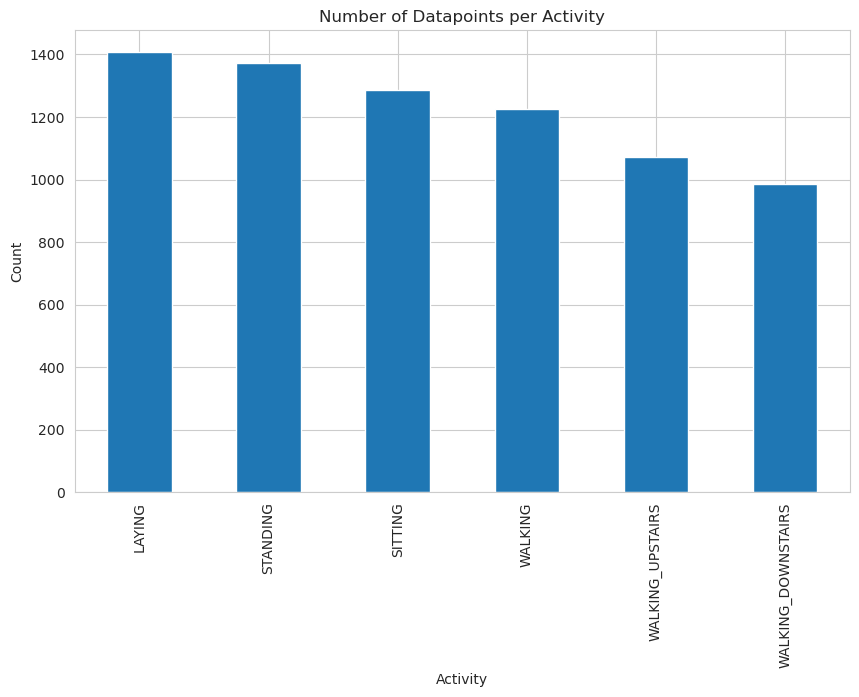

In [11]:
# plt.title('No of Datapoints per Activity', fontsize=15)
# sns.countplot(train.Activity) # count plot gives count of each activity
# plt.xticks(rotation=90)
# plt.show()

import matplotlib.pyplot as plt
import pandas as pd

# Assuming train is your DataFrame containing the 'Activity' column
# Replace 'Activity' with the actual column name if different
activity_counts = train['Activity'].value_counts()

plt.figure(figsize=(10, 6))
activity_counts.plot(kind='bar')
plt.title('Number of Datapoints per Activity')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


### Observation:
All activities is almost balanced.

# Exploratory Data Analysis

### 1. Featuring Engineering from Domain Knowledge 

+ __Static and Dynamic Activities__

    - In static activities (sit, stand, lie down) motion information will not be very useful.
	- In the dynamic activities (Walking, WalkingUpstairs,WalkingDownstairs) motion info will be useful.

### 2. Stationary and Moving activities are completely different

KeyError: "None of [Index(['tBodyAccMagmean'], dtype='object')] are in the [columns]"

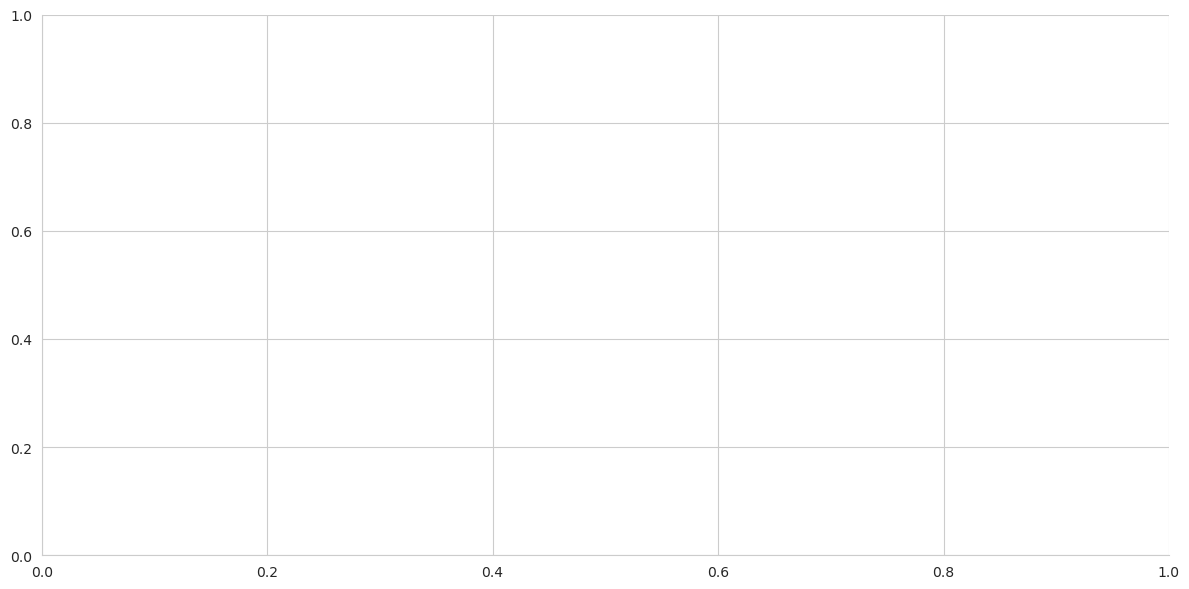

In [13]:
# sns.set_palette("Set1", desat=0.80) # Set the matplotlib color cycle using a seaborn palette.
# facetgrid = sns.FacetGrid(train, hue='Activity', size=6,aspect=2) # plot smooth histogram
# facetgrid.map(sns.distplot,'tBodyAccMagmean', hist=False)\
#     .add_legend()
# plt.annotate("Stationary Activities", xy=(-0.956,8), xytext=(-0.8, 12), size=20,\
#             va='center', ha='left',\
#             arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1")) # title

# plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
#             va='center', ha='left',\
#             arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1")) # title
# plt.show()

sns.set_palette("Set1", desat=0.80) # Set the matplotlib color cycle using a seaborn palette.

facetgrid = sns.FacetGrid(train, hue='Activity', height=6, aspect=2) # plot smooth histogram
facetgrid.map(sns.distplot, 'tBodyAccMagmean', hist=False).add_legend()

plt.annotate("Stationary Activities", xy=(-0.956, 8), xytext=(-0.8, 12), size=20,\
             va='center', ha='left',\
             arrowprops=dict(arrowstyle="simple", connectionstyle="arc3,rad=0.1")) # title

plt.annotate("Moving Activities", xy=(0, 3), xytext=(0.2, 9), size=20,
             va='center', ha='left',
             arrowprops=dict(arrowstyle="simple", connectionstyle="arc3,rad=0.1")) # title

plt.show()


### Observation:
From above plot we can see that for dynamic activites 'tBodyAccMagmean' features value is more than -0.5. So that we can easily distinguish stationary activities and moving activities.

In [ ]:
train['Activity'].value_counts()

In [ ]:
# for plotting purposes taking datapoints of each activity to a different dataframe
df1 = train[train['Activity']=='WALKING']
df2 = train[train['Activity']=='WALKING_UPSTAIRS']
df3 = train[train['Activity']=='WALKING_DOWNSTAIRS']
df4 = train[train['Activity']=='SITTING']
df5 = train[train['Activity']=='STANDING']
df6 = train[train['Activity']=='LAYING']

In [ ]:
plt.figure(figsize=(14,7))
plt.subplot(2,2,1) # plot subplots
plt.title('Stationary Activities')
sns.distplot(df4['tBodyAccMagmean'],color = 'r',hist = False, label = 'Sitting')
sns.distplot(df5['tBodyAccMagmean'],color = 'm',hist = False,label = 'Standing')
sns.distplot(df6['tBodyAccMagmean'],color = 'c',hist = False, label = 'Laying') # plot all stationary activities
plt.axis([-1.1, -0.5, 0, 35])
plt.legend(loc='center')

plt.subplot(2,2,2)
plt.title('Moving Activities')
sns.distplot(df1['tBodyAccMagmean'],color = 'red',hist = False, label = 'Walking')
sns.distplot(df2['tBodyAccMagmean'],color = 'blue',hist = False,label = 'Walking Up')
sns.distplot(df3['tBodyAccMagmean'],color = 'green',hist = False, label = 'Walking down') # plot all moving activities
plt.legend(loc='center right')

plt.tight_layout()
plt.show()

### 3. Magnitude of an acceleration can separate it well

In [ ]:
plt.figure(figsize=(6,5))
sns.boxplot(x='Activity', y='tBodyAccMagmean',data=train, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=40)
plt.show()

### Observations:
- If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.
- If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
- If tAccMean > 0.0 then the Activity is WalkingDownstairs.
- We can classify 75% the Acitivity labels with some errors.

### 4. Position of GravityAccelerationComponants also matters

In [ ]:
sns.boxplot(x='Activity', y='angleXgravityMean', data=train)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

### Observations:
* If angleX,gravityMean > 0 then Activity is Laying.
* We can classify all datapoints belonging to Laying activity with just a single if else statement.

# Dimensionality Reduction

- We have total 564 features, we could not able to analyze all the features through EDA. 

- By applying dimensionality reduction technique we can analyze all the features.

- Let's see can we able to differentiate activities after applying dimensionality reduction technique.

## Apply T-SNE on the data

- T - SNE is used for dimensionality reduction. Here we are converting 564 dimensions into 2 dimensions. So that we can easily analyze the data.

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
# performs t-sne with different perplexity values and their repective plots..
# https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        plt.show()
        print('Done')


- We have added subject column for EDA only, it will not be useful for tsne, drop it.
- we are applying tsne on activity. Use activity as a y label. 

In [ ]:
X_pre_tsne = train.drop(['subject','Activity'], axis=1)
y_pre_tsne = train['Activity']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[2,5,10])

### Observations:
- From above plot we can clearly distinguish all the activities, excluding standing and sitting. These two activities are overlapping with each other.
- After building a model may be it will be difficult for model to distinguish these 2 classes.
- Le't check...

# Make data model ready

In [ ]:
# get X_test and y_test from train csv file
X_train = train.drop(['subject', 'Activity'], axis=1)
y_train = train.Activity

In [ ]:
# get X_test and y_test from test csv file
X_test = test.drop(['subject', 'Activity'], axis=1)
y_test = test.Activity

In [ ]:
print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

# Model Building

### Creating a function to run any specified model

In [ ]:
# This function will return accuracy, normalized confusion matrix, precision, recall, and f1-score.
from datetime import datetime
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):
    
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done \n \n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('----------------------')
    print('|      Accuracy      |')
    print('----------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    # calculate overall precision of the model
    precision = metrics.precision_score(y_true=y_test, y_pred=y_pred, average="weighted")
    # store precision in results
    results['precision'] = precision
    print('-----------------------')
    print('|      Precision      |')
    print('-----------------------')
    print('\n    {}\n\n'.format(precision))
    
    # calculate overall recall of the model
    recall = metrics.recall_score(y_true=y_test, y_pred=y_pred, average="weighted")
    # store recall in results
    results['recall'] = recall
    print('--------------------')
    print('|      Recall      |')
    print('--------------------')
    print('\n    {}\n\n'.format(recall))
    
    
    # calculate overall F1 score of the model
    f1 = metrics.f1_score(y_true=y_test, y_pred=y_pred, average="weighted")
    # store F1 score in results
    results['f1'] = f1
    print('----------------------')
    print('|      F1 Score      |')
    print('----------------------')
    print('\n    {}\n\n'.format(f1))
    
    
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}\n\n'.format(cm))
    
    # sensitivity and specificity
    def calc_sensitivity(confusion_matrix):
        """Calculate sensitivity (true positive rate) from a confusion matrix."""
        tp = confusion_matrix[1, 1]
        fn = confusion_matrix[1, 0]
        sensitivity = tp / (tp + fn)
        return sensitivity

    def calc_specificity(confusion_matrix):
        """Calculate specificity (true negative rate) from a confusion matrix."""
        tn = confusion_matrix[0, 0]
        fp = confusion_matrix[0, 1]
        specificity = tn / (tn + fp)
        return specificity
    
    sensitivity = calc_sensitivity(cm)
    specificity = calc_specificity(cm)
    
    # store sensitivity and specificity in results
    results['sensitivity']=sensitivity
    results['specificity']=specificity
    
    print('---------------')
    print('| Sensitivity |')
    print('---------------')
    print('\n {}\n\n'.format(sensitivity))
    
    print('---------------')
    print('| Specificity |')
    print('---------------')
    print('\n {}\n\n'.format(specificity))
    
    # true positives, true negatives, false positives and false negatives
    def tp_tn_fp_fn(confusion_matrix):
        TN = cm[1][0]
        FN = cm[0][0]
        TP = cm[1][1]
        FP = cm[0][1]
        print('--------------------------------------------------------------------')
        print('| True Positive, True Negative, False Positive and False Negatives |')
        print('--------------------------------------------------------------------\n')
        
        # store TP,NP,FP,TN in results
        results['TP']=TP
        results['TN']=TN
        results['FP']=FP
        results['FN']=FN
        
        
        print("True Positive :",TP)
        print("True Negative :",TN)
        print("False Positive :",FP)
        print("False Negative :",FN)
        
        # Print rates of true positives, true negatives, false positives and false negatives
   
        TPR = TP/(TP+FN)
        TNR = TN/(TN+FP)
        FPR = FP/(FP+TN)
        FNR = FN/(TP+FN)
        
        # store rates in results
        results['TPR']=TPR
        results['TNR']=TNR
        results['FPR']=FPR
        results['FNR']=FNR
        
        print('\n\n---------------------------------------------------------------------------')
        print('| Rate of True Positive, True Negative, False Positive and False Negative |')
        print('---------------------------------------------------------------------------\n')
        print("True Positive Rate :",TPR)
        print("True Negative Rate :",TNR)
        print("False Positive Rate :",FPR)
        print("False Negative Rate :",FNR)
        

        # Print predictive value of positive and negative predictions
        PPV = TP/(TP+FP)
        NPV = TN/(TN+FN)
        
        # store PPV and NPV in results
        results['PPV']=PPV
        results['NPV']=NPV
        
        print('\n\n---------------------------------------------------------')
        print('| Predictive Value of Positive and Negative Predictions |')
        print('---------------------------------------------------------\n')
        print("Positive Predictive Value :",PPV)
        print("Negative predictive value :",NPV)
        
    tp_tn_fp_fn(cm)
    
        
    # plot confusin matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('\n\n------------------------')
    print('| Classifiction Report |')
    print('------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    


    # Define function to print model attributes and cross-validation results
    def print_attributes(model):

        test_encoded = pd.get_dummies(test)

        # Ensure that test set has same features as training set
        missing_cols = set(X_train.columns) - set(test_encoded.columns)
        for col in missing_cols:
            test_encoded[col] = 0
        test_encoded = test_encoded[X_train.columns]

        # Set up cross-validation using 5 folds
        kf = KFold(n_splits=5, shuffle=True, random_state=42)

        # Initialize list to store cross-validation scores
        scores = []

        # Perform cross-validation
        for train_index, val_index in kf.split(X_train):
            # Split training data into training and validation sets
            X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
            y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

            # Fit Logistic Regression model on training data
            model.fit(X_train_fold, y_train_fold)

            # Evaluate model performance on validation data
            score = model.score(X_val_fold, y_val_fold)
            scores.append(score)

        # Compute mean cross-validation score
        mean_score = sum(scores) / len(scores)

        # Fit Logistic Regression model on entire training data and make predictions on test data
        model.fit(X_train, y_train)

        y_pred = model.predict(test_encoded)


        # store test set predictions in results
        test_set_predictions = y_pred
        results['test_set_predictions'] = test_set_predictions


        print('\n\n---------------------------')
        print('|   Test set predictions  |')
        print('---------------------------\n')
        print(f"{test_set_predictions}")

        # store test set predictions in results
        cross_validation_scores=scores
        results['cross_validation_scores'] = cross_validation_scores

        print('\n\n-------------------------------')
        print('|   Cross-Validation Results  |')
        print('-------------------------------')
        print(f"\n{cross_validation_scores}")

        # store mean accuracy of cross validation scores in results

        mean_accuracy=mean_score
        results['mean_accuracy'] = mean_accuracy

        print('\n\n--------------------')
        print('|   Mean Accuracy  |')
        print('--------------------')
        print(f"\n{mean_accuracy:.2f}")

        # store standard deviation of scores in results    
        standard_deviation=np.std(scores)
        results['standard_deviation'] = standard_deviation

        print('\n\n-------------------------')
        print('|   Standard Deviation  |')
        print('-------------------------')
        print(f"\n{standard_deviation:.4f}")

        # store cross validation accuracy in results    
        cross_val_accuracy=mean_score*100
        results['cross_val_accuracy'] = cross_val_accuracy

        print('\n\n---------------')
        print('|   Accuracy  |')
        print('---------------')
        print(f"\n{cross_val_accuracy}")
    print_attributes(model)

    
    # add the trained  model to the results
    results['model'] = model
    
    return results
    

### Function to print the gridsearch Attributes

In [ ]:
# This fuction returns best parameters after applying gridsearch
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))


### Function to plot the confusion matrix

In [ ]:
# Labels that are useful in plotting confusion matrix
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix

# This fuction print confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## 1. Logistic Regression

In [ ]:
from sklearn import linear_model
from sklearn import metrics

log_reg = linear_model.LogisticRegression()
log_reg_results =  perform_model(log_reg, X_train, y_train, X_test, y_test, class_labels=labels)

In [ ]:
# plot confusion matrix
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(log_reg_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens, )
plt.show()

### Observations:
- We got 98.25% test accuracy.
- From confusion matrix we can clearly see that, there are more wrong predictions between standing and sitting classes. By observing tsne plot we have observed that these two classes are overlapped.

## 2. Linear SVC

In [ ]:
from sklearn.svm import LinearSVC

lr_svc = LinearSVC(tol=0.00005,max_iter=2000)
lr_svc_results = perform_model(lr_svc, X_train, y_train, X_test, y_test, class_labels=labels)

In [ ]:
# plot confusion matrix
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(lr_svc_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens, )
plt.show()

### Observations:
- We got 98.68% test accuracy.
- From confusion matrix we can clearly see that, there are more wrong predictions between standing and sitting classes.By observing tsne plot we have observed that these two classes are overlapped. 
- And also there are few wrong predictions between walking, walking downstairs and walking upstairs classes. By observing tsne plot we have observed that these three classes are overlapped.

## 3. SVM

In [ ]:
from sklearn.svm import SVC

rbf_svm = SVC(kernel='rbf')
rbf_svm_results = perform_model(rbf_svm, X_train, y_train, X_test, y_test, class_labels=labels)

In [ ]:
# plot confusion matrix
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(rbf_svm_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens, )
plt.show()

### Observations:
- We got 97.07% test accuracy.
- From confusion matrix we can clearly see that, there are more wrong predictions between standing and sitting classes.By observing tsne plot we have observed that these two classes are overlapped. 
- And also there are more wrong predictions between walking, walking downstairs and walking upstairs classes. By observing tsne plot we have observed that these three classes are overlapped.

## 4. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt_results = perform_model(dt, X_train, y_train, X_test, y_test, class_labels=labels)

In [ ]:
# plot confusion matrix
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(dt_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens, )
plt.show()

### Observations:
- We got 93.67% test accuracy.
- From confusion matrix we can clearly see that, there are large number of wrong predictions between standing and sitting classes.By observing tsne plot we have observed that these two classes are overlapped. 
- And also there are more wrong predictions between walking, walking downstairs and walking upstairs classes. By observing tsne plot we have observed that these three classes are overlapped.

## 5. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc_results = perform_model(rfc, X_train, y_train, X_test, y_test, class_labels=labels)

In [ ]:
# plot confusion matrix
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(rfc_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens, )
plt.show()

### Observations:
- We got 98.01% test accuracy.
- From confusion matrix we can clearly see that, there are more of wrong predictions between standing and sitting classes.By observing tsne plot we have observed that these two classes are overlapped. 
- And also there are more wrong predictions between walking, walking downstairs and walking upstairs classes. By observing tsne plot we have observed that these three classes are overlapped.

## 6. Gradient Boosted Decision Tree

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbdt = GradientBoostingClassifier()
gbdt_results = perform_model(gbdt, X_train, y_train, X_test, y_test, class_labels=labels)

In [ ]:
# plot confusion matrix
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(gbdt_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens, )
plt.show()

### Observations:
- We got 98.84% test accuracy.
- From confusion matrix we can clearly see that, there are large number of wrong predictions between standing and sitting classes.By observing tsne plot we have observed that these two classes are overlapped. 
- And also there are few wrong predictions between walking, walking downstairs and walking upstairs classes. By observing tsne plot we have observed that these three classes are overlapped.

## 7. KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn_results = perform_model(knn, X_train, y_train, X_test, y_test, class_labels=labels)

In [ ]:
# plot confusion matrix
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(knn_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens, )
plt.show()

### Observations:
- We got 96.50% test accuracy.
- From confusion matrix we can clearly see that, there are large number of wrong predictions between standing and sitting classes.By observing tsne plot we have observed that these two classes are overlapped. 
- And also there are more wrong predictions between walking, walking downstairs and walking upstairs classes. By observing tsne plot we have observed that these three classes are overlapped.

## 1. Logistic Regression with Grid Search

In [ ]:
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [ ]:
# start Grid search
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [ ]:
# plot confusion matrix
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(log_reg_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens, )
plt.show()

In [ ]:
# observe the attributes of the model 
print_grid_search_attributes(log_reg_grid_results['model'])

### Observations:
- We got 93.78% test accuracy.
- From confusion matrix we can clearly see that, there are more wrong predictions between standing and sitting classes. By observing tsne plot we have observed that these two classes are overlapped.

## 2. Linear SVC with GridSearch

In [ ]:
from sklearn.svm import LinearSVC
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005,max_iter=2000)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=-1, verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [ ]:
# plot confusion matrix
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(lr_svc_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens, )
plt.show()

In [ ]:
print_grid_search_attributes(lr_svc_grid_results['model'])

### Observations:
- We got 94.23% test accuracy.
- Here also in confusion matrix we can clearly see that, there are more wrong predictions between standing and sitting classes. By observing tsne plot we have observed that these two classes are overlapped.

## 3. Kernel SVM with GridSearch

In [ ]:
from sklearn.svm import SVC
parameters = {'C':[2,8,16],\
              'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=-1)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [ ]:
# plot confusion matrix
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(rbf_svm_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens, )
plt.show()

In [ ]:
print_grid_search_attributes(rbf_svm_grid_results['model'])

### Observations:
- We got 94.47% test accuracy.
- Here also in confusion matrix we can clearly see that, there are more wrong predictions between standing and sitting classes. By observing tsne plot we have observed that these two classes are overlapped.

### Let's check tree based models can overcome this problem

## 4. Decision Trees with GridSearchCV

In [ ]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=-1)
dt_grid_results = perform_model(dt_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [ ]:
# plot confusion matrix
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(dt_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens, )
plt.show()

In [ ]:
print_grid_search_attributes(dt_grid_results['model'])

### Observations:
- Got 85.37% accuracy. Accuracy is decreased.

## 5. Random Forest Classifier with GridSearch

In [ ]:
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1)
rfc_grid_results = perform_model(rfc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [ ]:
# plot confusion matrix
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(rfc_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens, )
plt.show()

In [ ]:
print_grid_search_attributes(rfc_grid_results['model'])

### Observations:
- We got 92.31% test accuracy.
- Here also in confusion matrix we can clearly see that, there are more wrong predictions between standing and sitting classes. By observing tsne plot we have observed that these two classes are overlapped.

## 6. Gradient Boosted Decision Trees With GridSearch

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {'max_depth': [1,2,3],
             'n_estimators':[100,150,200]}
gbdt = GradientBoostingClassifier()
gbdt_grid = GridSearchCV(gbdt, param_grid=param_grid, n_jobs=-1)
gbdt_grid_results = perform_model(gbdt_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [ ]:
# plot confusion matrix
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(gbdt_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens, )
plt.show()

In [ ]:
print_grid_search_attributes(gbdt_grid_results['model'])

## 7. KNN With Grid Search

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [5, 10, 20], 'weights': ['uniform', 'distance']}
knn_grid = GridSearchCV(knn, param_grid=param_grid, n_jobs=-1)
knn_grid_results = perform_model(knn_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [ ]:
# plot confusion matrix
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(knn_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens, )
plt.show()

In [ ]:
print_grid_search_attributes(knn_grid_results['model'])

## 8. Deep learning model

In [ ]:
# import required liabraries for Nueral Network
import tensorflow as tf
from tensorflow.keras import utils
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation 

In [ ]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'activities'.
y_train1 = label_encoder.fit_transform(y_train)
y_test1 = label_encoder.transform(y_test)
 
print(y_train1)
print(y_test1)

In [ ]:
# here we are having a categorical classes for each activity
print("Class label of first activity :", y_train[0])

# lets convert this into a 6 dimensional vector
# ex: consider a activity is "standing" convert it into 2 => [0, 0, 1, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = utils.to_categorical(y_train1, 6) 
Y_test = utils.to_categorical(y_test1, 6)

print("After converting the output into a vector : ",Y_train[0])

In [ ]:
# some model parameters

output_dim = 6
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 50

In [ ]:
# start building a model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model.add(Dense(12, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model.add(Dense(output_dim, activation='softmax'))

print(model.summary())

In [ ]:
# Before training a model, we need to configure the learning process, which is done via the compile method
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Keras models are trained on Numpy arrays of input data and labels. 
# For training a model, we will typically use the  fit function
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1)

In [ ]:
# Evaluate model on test data
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

In [ ]:
# # make predictions on test data
# y_pred = model.predict(X_test)

# # convert predictions to labels
# y_pred = np.argmax(y_pred, axis=1)

# # calculate metrics
# accuracy = accuracy_score(y_test1, y_pred)
# precision = precision_score(y_test1, y_pred, average='macro')
# recall = recall_score(y_test1, y_pred, average='macro')
# f1 = f1_score(y_test1, y_pred, average='macro')

# print('Accuracy:', accuracy)
# print('Precision:', precision)
# print('Recall:', recall)
# print('F1 score:', f1)

#### Note: We are not doing hypertunning on Nueral Network model.

There might be chance that accuracy of Deep learning model would be slightly increase after hyprtunning.

# 9. Deep learning model with grid search

In [ ]:
# # import Keras Tuner
# import kerastuner as kt

# # define the model building function with hyperparameters to be tuned
# def build_model(hp):
#   output_dim = 6
#   input_dim = X_train.shape[1]

#   # define the model architecture with tunable hyperparameters
#   model = Sequential()
#   model.add(Dense(hp.Int('units', min_value=32, max_value=512, step=32), activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
#   model.add(Dense(hp.Int('units', min_value=32, max_value=512, step=32), activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
#   model.add(Dense(output_dim, activation='softmax'))

#   # compile the model with tunable hyperparameters
#   model.compile(optimizer=hp.Choice('optimizer', ['adam', 'rmsprop', 'sgd']), loss='categorical_crossentropy', metrics=['accuracy'])

#   return model

# # define the tuner object
# tuner = kt.Hyperband(
#     build_model,
#     objective='val_accuracy',
#     max_epochs=10,
#     hyperband_iterations=2,
#     directory='my_dir',
#     project_name='my_project')

# # define the callbacks for early stopping and tracking the best model
# callbacks = [
#     tf.keras.callbacks.EarlyStopping(patience=3),
#     tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5', save_best_only=True, save_weights_only=True, monitor='val_accuracy', mode='max')
# ]

# # perform the hyperparameter tuning
# tuner.search(X_train, Y_train, epochs=50, validation_data=(X_test, Y_test), callbacks=callbacks)

# # get the best hyperparameters and model
# best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
# best_model = tuner.get_best_models(num_models=1)[0]

# # train the best model with the full dataset
# best_model.fit(X_train, Y_train, batch_size=128, epochs=50, verbose=1)

# # Evaluate model on test data
# score = best_model.evaluate(X_test, Y_test, verbose=0) 
# print('Test score:', score[0]) 
# print('Test accuracy:', score[1])


In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

# define the model
def create_model(hidden_layer_size=64, learning_rate=0.001):
    model = Sequential()
    model.add(Dense(hidden_layer_size, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
    model.add(Dense(12, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
    model.add(Dense(output_dim, activation='softmax'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# create the model
model = KerasClassifier(build_fn=create_model, verbose=0)

# define the grid search parameters
hidden_layer_sizes = [32, 64, 128]
learning_rates = [0.001, 0.01, 0.1]
param_grid = dict(hidden_layer_size=hidden_layer_sizes, learning_rate=learning_rates)

# perform the grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, Y_train)

# print the results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, std, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, std, param))


# Comparing all models

In [ ]:
print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04}%      {:.04}%'.format(log_reg_results['accuracy'] * 100,\
                                                  100-(log_reg_results['accuracy'] * 100)))

print('Linear SVC          : {:.04}%      {:.04}% '.format(lr_svc_results['accuracy'] * 100,\
                                                        100-(lr_svc_results['accuracy'] * 100)))

print('rbf SVM classifier  : {:.04}%      {:.04}% '.format(rbf_svm_results['accuracy'] * 100,\
                                                          100-(rbf_svm_results['accuracy'] * 100)))

print('DecisionTree        : {:.04}%      {:.04}% '.format(dt_results['accuracy'] * 100,\
                                                        100-(dt_results['accuracy'] * 100)))

print('Random Forest       : {:.04}%      {:.04}% '.format(rfc_results['accuracy'] * 100,\
                                                           100-(rfc_results['accuracy'] * 100)))
print('GradientBoosting DT : {:.04}%      {:.04}% '.format(gbdt_results['accuracy'] * 100,\
                                                        100-(gbdt_results['accuracy'] * 100)))
print('KNN                 : {:.04}%      {:.04}% '.format(knn_results['accuracy'] * 100,\
                                                        100-(knn_results['accuracy'] * 100)))

print('                     ----------   --------')
print("Algorithms with Grid Search")
print('                     ----------   --------')

print('Logistic Regression : {:.04}%      {:.04}%'.format(log_reg_grid_results['accuracy'] * 100,\
                                                  100-(log_reg_grid_results['accuracy'] * 100)))

print('Linear SVC          : {:.04}%      {:.04}% '.format(lr_svc_grid_results['accuracy'] * 100,\
                                                        100-(lr_svc_grid_results['accuracy'] * 100)))

print('rbf SVM classifier  : {:.04}%      {:.04}% '.format(rbf_svm_grid_results['accuracy'] * 100,\
                                                          100-(rbf_svm_grid_results['accuracy'] * 100)))

print('DecisionTree        : {:.04}%      {:.04}% '.format(dt_grid_results['accuracy'] * 100,\
                                                        100-(dt_grid_results['accuracy'] * 100)))

print('Random Forest       : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                           100-(rfc_grid_results['accuracy'] * 100)))
print('GradientBoosting DT : {:.04}%       {:.04}% '.format(gbdt_grid_results['accuracy'] * 100,\
                                                        100-(gbdt_grid_results['accuracy'] * 100)))
print('KNN                 : {:.04}%      {:.04}% '.format(knn_grid_results['accuracy'] * 100,\
                                                        100-(knn_grid_results['accuracy'] * 100)))
print('Deep Learning       : {:.04}%      {:.04}% '.format(score[1] * 100,\
                                                        100-(score[1] * 100)))

In [ ]:
# Import library for data visualization
import matplotlib.pyplot as plt

# Create a list of the algorithms and their corresponding accuracy scores
algorithms = ["Logistic \n Regression","Linear SVC", "SVM", "Decision Tree","Random Forest","Gradient Boosting \nDecision Tree" ,"KNN","Deep Learning"]
scores = [log_reg_results['accuracy'] * 100,lr_svc_results['accuracy'] * 100,rbf_svm_results['accuracy'] * 100,dt_results['accuracy'] * 100,rfc_results['accuracy'] * 100,gbdt_results['accuracy'] * 100,knn_results['accuracy'] * 100,score[1] * 100]

# Create a bar plot to compare the performance of the different algorithms
plt.bar(algorithms, scores)
plt.xlabel("\nAlgorithms")
plt.ylabel("Accuracy")
plt.title("Comparison of Algorithm Performances")
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Import library for data visualization
import matplotlib.pyplot as plt

# Create a list of the algorithms and their corresponding accuracy scores
algorithms = ["Logistic \n Regression","Linear SVC", "SVM", "Decision Tree","Random Forest","Gradient Boosting \nDecision Tree", "KNN"]
scores = [log_reg_grid_results['accuracy'] * 100,lr_svc_grid_results['accuracy'] * 100,rbf_svm_grid_results['accuracy'] * 100,dt_grid_results['accuracy'] * 100,rfc_grid_results['accuracy'] * 100,gbdt_grid_results['accuracy'] * 100, knn_grid_results['accuracy'] * 100]

# Create a bar plot to compare the performance of the different algorithms
plt.bar(algorithms, scores)
plt.xlabel("\nAlgorithms")
plt.ylabel("Accuracy")
plt.title("Comparison of Algorithm With Grid Search Performances")
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Import library for data visualization
import matplotlib.pyplot as plt

# Create a list of the algorithms and their corresponding accuracy scores
algorithms = ["Logistic Regression","Linear SVC", "SVM", "Decision Tree","Random Forest", "Gradient Boosting \nDecision Tree","KNN","Logistic Regression\n Grid Search","Linear SVC\n Grid Search", "SVM Grid Search", "Decision Tree\n Grid Search","Random Forest\n Grid Search","GBDT Grid Search", "KNN Grid Search", "Deep Learning"]
scores = [log_reg_results['accuracy'] * 100,lr_svc_results['accuracy'] * 100,rbf_svm_results['accuracy'] * 100,dt_results['accuracy'] * 100,rfc_results['accuracy'] * 100,gbdt_results['accuracy'] * 100, knn_results['accuracy'] * 100,log_reg_grid_results['accuracy'] * 100,lr_svc_grid_results['accuracy'] * 100,rbf_svm_grid_results['accuracy'] * 100,dt_grid_results['accuracy'] * 100,rfc_grid_results['accuracy'] * 100,gbdt_grid_results['accuracy'] * 100,knn_grid_results['accuracy'] * 100,score[1] * 100]

plt.figure(figsize=(14, 6))
# Create a bar plot to compare the performance of the different algorithms
plt.bar(algorithms, scores)

plt.xlabel("\nAlgorithms")
plt.ylabel("Accuracy")
plt.title("Comparison of Algorithm Performances Based on Accuracy")
plt.xticks(rotation=90)

plt.show()

In [ ]:
# Import library for data visualization
import matplotlib.pyplot as plt

# Create a list of the algorithms and their corresponding precision scores
algorithms = ["Logistic Regression","Linear SVC", "SVM", "Decision Tree","Random Forest", "Gradient Boosting \nDecision Tree","KNN","Logistic Regression\n Grid Search","Linear SVC\n Grid Search", "SVM Grid Search", "Decision Tree\n Grid Search","Random Forest\n Grid Search","GBDT Grid Search", "KNN Grid Search", "Deep Learning"]
scores = [log_reg_results['precision'] * 100,lr_svc_results['precision'] * 100,rbf_svm_results['precision'] * 100,dt_results['precision'] * 100,rfc_results['precision'] * 100,gbdt_results['precision'] * 100, knn_results['precision'] * 100,log_reg_grid_results['precision'] * 100,lr_svc_grid_results['precision'] * 100,rbf_svm_grid_results['precision'] * 100,dt_grid_results['precision'] * 100,rfc_grid_results['precision'] * 100,gbdt_grid_results['precision'] * 100,knn_grid_results['precision'] * 100,score[1] * 100]

plt.figure(figsize=(14, 6))
# Create a bar plot to compare the performance of the different algorithms
plt.bar(algorithms, scores)

plt.xlabel("\nAlgorithms")
plt.ylabel("Precision")
plt.title("Comparison of Algorithm Performances Based on Precision")
plt.xticks(rotation=90)

plt.show()

In [ ]:
# Import library for data visualization
import matplotlib.pyplot as plt

# Create a list of the algorithms and their corresponding recall scores
algorithms = ["Logistic Regression","Linear SVC", "SVM", "Decision Tree","Random Forest", "Gradient Boosting \nDecision Tree","KNN","Logistic Regression\n Grid Search","Linear SVC\n Grid Search", "SVM Grid Search", "Decision Tree\n Grid Search","Random Forest\n Grid Search","GBDT Grid Search", "KNN Grid Search", "Deep Learning"]
scores = [log_reg_results['recall'] * 100,lr_svc_results['recall'] * 100,rbf_svm_results['recall'] * 100,dt_results['recall'] * 100,rfc_results['recall'] * 100,gbdt_results['recall'] * 100, knn_results['recall'] * 100,log_reg_grid_results['recall'] * 100,lr_svc_grid_results['recall'] * 100,rbf_svm_grid_results['recall'] * 100,dt_grid_results['recall'] * 100,rfc_grid_results['recall'] * 100,gbdt_grid_results['recall'] * 100,knn_grid_results['recall'] * 100,score[1] * 100]

plt.figure(figsize=(14, 6))
# Create a bar plot to compare the performance of the different algorithms
plt.bar(algorithms, scores)

plt.xlabel("\nAlgorithms")
plt.ylabel("Recall")
plt.title("Comparison of Algorithm Performances Based on Recall")
plt.xticks(rotation=90)

plt.show()

In [ ]:
# Import library for data visualization
import matplotlib.pyplot as plt

# Create a list of the algorithms and their corresponding f1 scores
algorithms = ["Logistic Regression","Linear SVC", "SVM", "Decision Tree","Random Forest", "Gradient Boosting \nDecision Tree","KNN","Logistic Regression\n Grid Search","Linear SVC\n Grid Search", "SVM Grid Search", "Decision Tree\n Grid Search","Random Forest\n Grid Search","GBDT Grid Search", "KNN Grid Search", "Deep Learning"]
scores = [log_reg_results['f1'] * 100,lr_svc_results['f1'] * 100,rbf_svm_results['f1'] * 100,dt_results['f1'] * 100,rfc_results['f1'] * 100,gbdt_results['f1'] * 100, knn_results['f1'] * 100,log_reg_grid_results['f1'] * 100,lr_svc_grid_results['f1'] * 100,rbf_svm_grid_results['f1'] * 100,dt_grid_results['f1'] * 100,rfc_grid_results['f1'] * 100,gbdt_grid_results['f1'] * 100,knn_grid_results['f1'] * 100,score[1] * 100]

plt.figure(figsize=(14, 6))
# Create a bar plot to compare the performance of the different algorithms
plt.bar(algorithms, scores)

plt.xlabel("\nAlgorithms")
plt.ylabel("F1 Score")
plt.title("Comparison of Algorithm Performances Based onn F1 Score")
plt.xticks(rotation=90)

plt.show()

In [ ]:
# Import library for data visualization
import matplotlib.pyplot as plt

# Create a list of the algorithms and their corresponding ‘cross_val_accuracy’ scores
algorithms = ["Logistic Regression","Linear SVC", "SVM", "Decision Tree","Random Forest", "Gradient Boosting \nDecision Tree","KNN","Logistic Regression\n Grid Search","Linear SVC\n Grid Search", "SVM Grid Search", "Decision Tree\n Grid Search","Random Forest\n Grid Search","GBDT Grid Search", "KNN Grid Search", "Deep Learning"]
scores = [log_reg_results['cross_val_accuracy'] ,lr_svc_results['cross_val_accuracy'] ,rbf_svm_results['cross_val_accuracy'] ,dt_results['cross_val_accuracy'] ,rfc_results['cross_val_accuracy'] ,gbdt_results['cross_val_accuracy'] , knn_results['cross_val_accuracy'] ,log_reg_grid_results['cross_val_accuracy'] ,lr_svc_grid_results['cross_val_accuracy'] ,rbf_svm_grid_results['cross_val_accuracy'] ,dt_grid_results['cross_val_accuracy'] ,rfc_grid_results['cross_val_accuracy'] ,gbdt_grid_results['cross_val_accuracy'] ,knn_grid_results['cross_val_accuracy'] ,score[1] * 100]

plt.figure(figsize=(14, 6))
# Create a bar plot to compare the performance of the different algorithms
plt.bar(algorithms, scores)

plt.xlabel("\nAlgorithms")
plt.ylabel("Cross Validation Test Accuracy")
plt.title("Comparison of Algorithm Performances Based on Cross Validation Test Accuracy")
plt.xticks(rotation=90)

plt.show()

In [ ]:
import pandas as pd

# Create a dictionary of results
results = {
    'Algorithm Name': ["Logistic Regression","Linear SVC", "SVM", "Decision Tree","Random Forest", "Gradient Boosting Decision Tree","KNN","Logistic Regression Grid Search","Linear SVC Grid Search", 
                       "SVM Grid Search", "Decision Tree Grid Search","Random Forest Grid Search","GBDT Grid Search", "KNN Grid Search"],
    
    'Accuracy': [ log_reg_results['accuracy'] ,lr_svc_results['accuracy'] ,rbf_svm_results['accuracy'] ,dt_results['accuracy'] ,rfc_results['accuracy'] ,gbdt_results['accuracy'] , 
                 knn_results['accuracy'] ,log_reg_grid_results['accuracy'] ,lr_svc_grid_results['accuracy'] ,rbf_svm_grid_results['accuracy'] ,dt_grid_results['accuracy'] ,rfc_grid_results['accuracy'] ,
                 gbdt_grid_results['accuracy'] ,knn_grid_results['accuracy'] ],
    
    'Precision': [ log_reg_results['precision'] ,lr_svc_results['precision'] ,rbf_svm_results['precision'] ,dt_results['precision'] ,rfc_results['precision'] ,gbdt_results['precision'] , 
                 knn_results['precision'] ,log_reg_grid_results['precision'] ,lr_svc_grid_results['precision'] ,rbf_svm_grid_results['precision'] ,dt_grid_results['precision'] ,rfc_grid_results['precision'] ,
                 gbdt_grid_results['precision'] ,knn_grid_results['precision'] ],
    
    'Recall': [log_reg_results['recall'] ,lr_svc_results['recall'] ,rbf_svm_results['recall'] ,dt_results['recall'] ,rfc_results['recall'] ,gbdt_results['recall'] , 
                 knn_results['recall'] ,log_reg_grid_results['recall'] ,lr_svc_grid_results['recall'] ,rbf_svm_grid_results['recall'] ,dt_grid_results['recall'] ,rfc_grid_results['recall'] ,
                 gbdt_grid_results['recall'] ,knn_grid_results['recall'] ],
    
    'F1 Score': [log_reg_results['f1'] ,lr_svc_results['f1'] ,rbf_svm_results['f1'] ,dt_results['f1'] ,rfc_results['f1'] ,gbdt_results['f1'] , 
                 knn_results['f1'] ,log_reg_grid_results['f1'] ,lr_svc_grid_results['f1'] ,rbf_svm_grid_results['f1'] ,dt_grid_results['f1'] ,rfc_grid_results['f1'] ,
                 gbdt_grid_results['f1'] ,knn_grid_results['f1'] ],
    
    'Sensitivity': [log_reg_results['sensitivity'] ,lr_svc_results['sensitivity'] ,rbf_svm_results['sensitivity'] ,dt_results['sensitivity'] ,rfc_results['sensitivity'] ,gbdt_results['sensitivity'] , 
                 knn_results['sensitivity'] ,log_reg_grid_results['sensitivity'] ,lr_svc_grid_results['sensitivity'] ,rbf_svm_grid_results['sensitivity'] ,dt_grid_results['sensitivity'] ,rfc_grid_results['sensitivity'] ,
                 gbdt_grid_results['sensitivity'] ,knn_grid_results['sensitivity'] ],
    
    'Specificity': [log_reg_results['specificity'] ,lr_svc_results['specificity'] ,rbf_svm_results['specificity'] ,dt_results['specificity'] ,rfc_results['specificity'] ,gbdt_results['specificity'] , 
                 knn_results['specificity'] ,log_reg_grid_results['specificity'] ,lr_svc_grid_results['specificity'] ,rbf_svm_grid_results['specificity'] ,dt_grid_results['specificity'] ,rfc_grid_results['specificity'] ,
                 gbdt_grid_results['specificity'] ,knn_grid_results['specificity'] ],
    
    'True Negative': [log_reg_results['TN'] ,lr_svc_results['TN'] ,rbf_svm_results['TN'] ,dt_results['TN'] ,rfc_results['TN'] ,gbdt_results['TN'] , 
                 knn_results['TN'] ,log_reg_grid_results['TN'] ,lr_svc_grid_results['TN'] ,rbf_svm_grid_results['TN'] ,dt_grid_results['TN'] ,rfc_grid_results['TN'] ,
                 gbdt_grid_results['TN'] ,knn_grid_results['TN'] ],
    
    'True Positive': [log_reg_results['TP'] ,lr_svc_results['TP'] ,rbf_svm_results['TP'] ,dt_results['TP'] ,rfc_results['TP'] ,gbdt_results['TP'] , 
                 knn_results['TP'] ,log_reg_grid_results['TP'] ,lr_svc_grid_results['TP'] ,rbf_svm_grid_results['TP'] ,dt_grid_results['TP'] ,rfc_grid_results['TP'] ,
                 gbdt_grid_results['TP'] ,knn_grid_results['TP'] ],
    
    'False Negative': [log_reg_results['FN'] ,lr_svc_results['FN'] ,rbf_svm_results['FN'] ,dt_results['FN'] ,rfc_results['FN'] ,gbdt_results['FN'] , 
                 knn_results['FN'] ,log_reg_grid_results['FN'] ,lr_svc_grid_results['FN'] ,rbf_svm_grid_results['FN'] ,dt_grid_results['FN'] ,rfc_grid_results['FN'] ,
                 gbdt_grid_results['FN'] ,knn_grid_results['FN'] ],
    
    'False Positive': [log_reg_results['FP'] ,lr_svc_results['FP'] ,rbf_svm_results['FP'] ,dt_results['FP'] ,rfc_results['FP'] ,gbdt_results['FP'] , 
                 knn_results['FP'] ,log_reg_grid_results['FP'] ,lr_svc_grid_results['FP'] ,rbf_svm_grid_results['FP'] ,dt_grid_results['FP'] ,rfc_grid_results['FP'] ,
                 gbdt_grid_results['FP'] ,knn_grid_results['FP'] ],
    
    'True Negative Rate': [log_reg_results['TNR'] ,lr_svc_results['TNR'] ,rbf_svm_results['TNR'] ,dt_results['TNR'] ,rfc_results['TNR'] ,gbdt_results['TNR'] , 
                 knn_results['TNR'] ,log_reg_grid_results['TNR'] ,lr_svc_grid_results['TNR'] ,rbf_svm_grid_results['TNR'] ,dt_grid_results['TNR'] ,rfc_grid_results['TNR'] ,
                 gbdt_grid_results['TNR'] ,knn_grid_results['TNR'] ],
    
    'True Positive Rate': [log_reg_results['TPR'] ,lr_svc_results['TPR'] ,rbf_svm_results['TPR'] ,dt_results['TPR'] ,rfc_results['TPR'] ,gbdt_results['TPR'] , 
                 knn_results['TPR'] ,log_reg_grid_results['TPR'] ,lr_svc_grid_results['TPR'] ,rbf_svm_grid_results['TPR'] ,dt_grid_results['TPR'] ,rfc_grid_results['TPR'] ,
                 gbdt_grid_results['TPR'] ,knn_grid_results['TPR'] ],
    
    'False Negative Rate': [log_reg_results['FNR'] ,lr_svc_results['FNR'] ,rbf_svm_results['FNR'] ,dt_results['FNR'] ,rfc_results['FNR'] ,gbdt_results['FNR'] , 
                 knn_results['FNR'] ,log_reg_grid_results['FNR'] ,lr_svc_grid_results['FNR'] ,rbf_svm_grid_results['FNR'] ,dt_grid_results['FNR'] ,rfc_grid_results['FNR'] ,
                 gbdt_grid_results['FNR'] ,knn_grid_results['FNR'] ],
    
    'False Positive Rate': [log_reg_results['FPR'] ,lr_svc_results['FPR'] ,rbf_svm_results['FPR'] ,dt_results['FPR'] ,rfc_results['FPR'] ,gbdt_results['FPR'] , 
                 knn_results['FPR'] ,log_reg_grid_results['FPR'] ,lr_svc_grid_results['FPR'] ,rbf_svm_grid_results['FPR'] ,dt_grid_results['FPR'] ,rfc_grid_results['FPR'] ,
                 gbdt_grid_results['FPR'] ,knn_grid_results['FPR']],
    
    'Positive Pedictive Value': [log_reg_results['PPV'] ,lr_svc_results['PPV'] ,rbf_svm_results['PPV'] ,dt_results['PPV'] ,rfc_results['PPV'] ,gbdt_results['PPV'] , 
                 knn_results['PPV'] ,log_reg_grid_results['PPV'] ,lr_svc_grid_results['PPV'] ,rbf_svm_grid_results['PPV'] ,dt_grid_results['PPV'] ,rfc_grid_results['PPV'] ,
                 gbdt_grid_results['PPV'] ,knn_grid_results['PPV'] ],
    
    'Negative Pedictive Value': [log_reg_results['NPV'] ,lr_svc_results['NPV'] ,rbf_svm_results['NPV'] ,dt_results['NPV'] ,rfc_results['NPV'] ,gbdt_results['NPV'] , 
                 knn_results['NPV'] ,log_reg_grid_results['NPV'] ,lr_svc_grid_results['NPV'] ,rbf_svm_grid_results['NPV'] ,dt_grid_results['NPV'] ,rfc_grid_results['NPV'] ,
                 gbdt_grid_results['NPV'] ,knn_grid_results['NPV'] ],
    
    'Cross-Val Accuracy':[log_reg_results['mean_accuracy'] ,lr_svc_results['mean_accuracy'] ,rbf_svm_results['mean_accuracy'] ,dt_results['mean_accuracy'] ,rfc_results['mean_accuracy'] ,gbdt_results['mean_accuracy'] , 
                 knn_results['mean_accuracy'] ,log_reg_grid_results['mean_accuracy'] ,lr_svc_grid_results['mean_accuracy'] ,rbf_svm_grid_results['mean_accuracy'] ,dt_grid_results['mean_accuracy'] ,rfc_grid_results['mean_accuracy'] ,
                 gbdt_grid_results['mean_accuracy'] ,knn_grid_results['mean_accuracy'] ]
    
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(results)
pd.set_option('expand_frame_repr', False)

# Set the index to the algorithm names
df.set_index('Algorithm Name', inplace=True)

# Print the DataFrame
print(df.to_markdown())

In [ ]:
import pandas as pd

# Create a dictionary of results
results = {
    'Algorithm Name': ["Logistic Regression","Linear SVC", "SVM", "Decision Tree","Random Forest", "Gradient Boosting Decision Tree","KNN","Logistic Regression Grid Search","Linear SVC Grid Search", 
                       "SVM Grid Search", "Decision Tree Grid Search","Random Forest Grid Search","GBDT Grid Search", "KNN Grid Search"],
    
    'Accuracy': [ log_reg_results['accuracy'] ,lr_svc_results['accuracy'] ,rbf_svm_results['accuracy'] ,dt_results['accuracy'] ,rfc_results['accuracy'] ,gbdt_results['accuracy'] , 
                 knn_results['accuracy'] ,log_reg_grid_results['accuracy'] ,lr_svc_grid_results['accuracy'] ,rbf_svm_grid_results['accuracy'] ,dt_grid_results['accuracy'] ,rfc_grid_results['accuracy'] ,
                 gbdt_grid_results['accuracy'] ,knn_grid_results['accuracy'] ],
    
    'Precision': [ log_reg_results['precision'] ,lr_svc_results['precision'] ,rbf_svm_results['precision'] ,dt_results['precision'] ,rfc_results['precision'] ,gbdt_results['precision'] , 
                 knn_results['precision'] ,log_reg_grid_results['precision'] ,lr_svc_grid_results['precision'] ,rbf_svm_grid_results['precision'] ,dt_grid_results['precision'] ,rfc_grid_results['precision'] ,
                 gbdt_grid_results['precision'] ,knn_grid_results['precision'] ],
    
    'Recall': [log_reg_results['recall'] ,lr_svc_results['recall'] ,rbf_svm_results['recall'] ,dt_results['recall'] ,rfc_results['recall'] ,gbdt_results['recall'] , 
                 knn_results['recall'] ,log_reg_grid_results['recall'] ,lr_svc_grid_results['recall'] ,rbf_svm_grid_results['recall'] ,dt_grid_results['recall'] ,rfc_grid_results['recall'] ,
                 gbdt_grid_results['recall'] ,knn_grid_results['recall'] ],
    
    'F1 Score': [log_reg_results['f1'] ,lr_svc_results['f1'] ,rbf_svm_results['f1'] ,dt_results['f1'] ,rfc_results['f1'] ,gbdt_results['f1'] , 
                 knn_results['f1'] ,log_reg_grid_results['f1'] ,lr_svc_grid_results['f1'] ,rbf_svm_grid_results['f1'] ,dt_grid_results['f1'] ,rfc_grid_results['f1'] ,
                 gbdt_grid_results['f1'] ,knn_grid_results['f1'] ],
    
    'Sensitivity': [log_reg_results['sensitivity'] ,lr_svc_results['sensitivity'] ,rbf_svm_results['sensitivity'] ,dt_results['sensitivity'] ,rfc_results['sensitivity'] ,gbdt_results['sensitivity'] , 
                 knn_results['sensitivity'] ,log_reg_grid_results['sensitivity'] ,lr_svc_grid_results['sensitivity'] ,rbf_svm_grid_results['sensitivity'] ,dt_grid_results['sensitivity'] ,rfc_grid_results['sensitivity'] ,
                 gbdt_grid_results['sensitivity'] ,knn_grid_results['sensitivity'] ],
    
    'Specificity': [log_reg_results['specificity'] ,lr_svc_results['specificity'] ,rbf_svm_results['specificity'] ,dt_results['specificity'] ,rfc_results['specificity'] ,gbdt_results['specificity'] , 
                 knn_results['specificity'] ,log_reg_grid_results['specificity'] ,lr_svc_grid_results['specificity'] ,rbf_svm_grid_results['specificity'] ,dt_grid_results['specificity'] ,rfc_grid_results['specificity'] ,
                 gbdt_grid_results['specificity'] ,knn_grid_results['specificity'] ],
    
    'True Negative': [log_reg_results['TN'] ,lr_svc_results['TN'] ,rbf_svm_results['TN'] ,dt_results['TN'] ,rfc_results['TN'] ,gbdt_results['TN'] , 
                 knn_results['TN'] ,log_reg_grid_results['TN'] ,lr_svc_grid_results['TN'] ,rbf_svm_grid_results['TN'] ,dt_grid_results['TN'] ,rfc_grid_results['TN'] ,
                 gbdt_grid_results['TN'] ,knn_grid_results['TN'] ],
    
    'True Positive': [log_reg_results['TP'] ,lr_svc_results['TP'] ,rbf_svm_results['TP'] ,dt_results['TP'] ,rfc_results['TP'] ,gbdt_results['TP'] , 
                 knn_results['TP'] ,log_reg_grid_results['TP'] ,lr_svc_grid_results['TP'] ,rbf_svm_grid_results['TP'] ,dt_grid_results['TP'] ,rfc_grid_results['TP'] ,
                 gbdt_grid_results['TP'] ,knn_grid_results['TP'] ],
    
    'False Negative': [log_reg_results['FN'] ,lr_svc_results['FN'] ,rbf_svm_results['FN'] ,dt_results['FN'] ,rfc_results['FN'] ,gbdt_results['FN'] , 
                 knn_results['FN'] ,log_reg_grid_results['FN'] ,lr_svc_grid_results['FN'] ,rbf_svm_grid_results['FN'] ,dt_grid_results['FN'] ,rfc_grid_results['FN'] ,
                 gbdt_grid_results['FN'] ,knn_grid_results['FN'] ],
    
    'False Positive': [log_reg_results['FP'] ,lr_svc_results['FP'] ,rbf_svm_results['FP'] ,dt_results['FP'] ,rfc_results['FP'] ,gbdt_results['FP'] , 
                 knn_results['FP'] ,log_reg_grid_results['FP'] ,lr_svc_grid_results['FP'] ,rbf_svm_grid_results['FP'] ,dt_grid_results['FP'] ,rfc_grid_results['FP'] ,
                 gbdt_grid_results['FP'] ,knn_grid_results['FP'] ],
    
    
    'Positive Pedictive Value': [log_reg_results['PPV'] ,lr_svc_results['PPV'] ,rbf_svm_results['PPV'] ,dt_results['PPV'] ,rfc_results['PPV'] ,gbdt_results['PPV'] , 
                 knn_results['PPV'] ,log_reg_grid_results['PPV'] ,lr_svc_grid_results['PPV'] ,rbf_svm_grid_results['PPV'] ,dt_grid_results['PPV'] ,rfc_grid_results['PPV'] ,
                 gbdt_grid_results['PPV'] ,knn_grid_results['PPV'] ],
    
    'Negative Pedictive Value': [log_reg_results['NPV'] ,lr_svc_results['NPV'] ,rbf_svm_results['NPV'] ,dt_results['NPV'] ,rfc_results['NPV'] ,gbdt_results['NPV'] , 
                 knn_results['NPV'] ,log_reg_grid_results['NPV'] ,lr_svc_grid_results['NPV'] ,rbf_svm_grid_results['NPV'] ,dt_grid_results['NPV'] ,rfc_grid_results['NPV'] ,
                 gbdt_grid_results['NPV'] ,knn_grid_results['NPV'] ],
    
    'Cross-Val Accuracy':[log_reg_results['mean_accuracy'] ,lr_svc_results['mean_accuracy'] ,rbf_svm_results['mean_accuracy'] ,dt_results['mean_accuracy'] ,rfc_results['mean_accuracy'] ,gbdt_results['mean_accuracy'] , 
                 knn_results['mean_accuracy'] ,log_reg_grid_results['mean_accuracy'] ,lr_svc_grid_results['mean_accuracy'] ,rbf_svm_grid_results['mean_accuracy'] ,dt_grid_results['mean_accuracy'] ,rfc_grid_results['mean_accuracy'] ,
                 gbdt_grid_results['mean_accuracy'] ,knn_grid_results['mean_accuracy'] ]
    
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(results)
pd.set_option('expand_frame_repr', False)

# Set the index to the algorithm names
df.set_index('Algorithm Name', inplace=True)

# Print the DataFrame
print(df.to_markdown())

In [ ]:
import pandas as pd

# Create a dictionary of results
results = {
    'Algorithm Name': ["Logistic Regression","Linear SVC", "SVM", "Decision Tree","Random Forest", "Gradient Boosting Decision Tree","KNN","Logistic Regression Grid Search","Linear SVC Grid Search", 
                       "SVM Grid Search", "Decision Tree Grid Search","Random Forest Grid Search","GBDT Grid Search", "KNN Grid Search"],
    
    'Accuracy': [ log_reg_results['accuracy'] ,lr_svc_results['accuracy'] ,rbf_svm_results['accuracy'] ,dt_results['accuracy'] ,rfc_results['accuracy'] ,gbdt_results['accuracy'] , 
                 knn_results['accuracy'] ,log_reg_grid_results['accuracy'] ,lr_svc_grid_results['accuracy'] ,rbf_svm_grid_results['accuracy'] ,dt_grid_results['accuracy'] ,rfc_grid_results['accuracy'] ,
                 gbdt_grid_results['accuracy'] ,knn_grid_results['accuracy'] ],
    
    'Precision': [ log_reg_results['precision'] ,lr_svc_results['precision'] ,rbf_svm_results['precision'] ,dt_results['precision'] ,rfc_results['precision'] ,gbdt_results['precision'] , 
                 knn_results['precision'] ,log_reg_grid_results['precision'] ,lr_svc_grid_results['precision'] ,rbf_svm_grid_results['precision'] ,dt_grid_results['precision'] ,rfc_grid_results['precision'] ,
                 gbdt_grid_results['precision'] ,knn_grid_results['precision'] ],
    
    'Recall': [log_reg_results['recall'] ,lr_svc_results['recall'] ,rbf_svm_results['recall'] ,dt_results['recall'] ,rfc_results['recall'] ,gbdt_results['recall'] , 
                 knn_results['recall'] ,log_reg_grid_results['recall'] ,lr_svc_grid_results['recall'] ,rbf_svm_grid_results['recall'] ,dt_grid_results['recall'] ,rfc_grid_results['recall'] ,
                 gbdt_grid_results['recall'] ,knn_grid_results['recall'] ],
    
    'F1 Score': [log_reg_results['f1'] ,lr_svc_results['f1'] ,rbf_svm_results['f1'] ,dt_results['f1'] ,rfc_results['f1'] ,gbdt_results['f1'] , 
                 knn_results['f1'] ,log_reg_grid_results['f1'] ,lr_svc_grid_results['f1'] ,rbf_svm_grid_results['f1'] ,dt_grid_results['f1'] ,rfc_grid_results['f1'] ,
                 gbdt_grid_results['f1'] ,knn_grid_results['f1'] ],
    
    'Sensitivity': [log_reg_results['sensitivity'] ,lr_svc_results['sensitivity'] ,rbf_svm_results['sensitivity'] ,dt_results['sensitivity'] ,rfc_results['sensitivity'] ,gbdt_results['sensitivity'] , 
                 knn_results['sensitivity'] ,log_reg_grid_results['sensitivity'] ,lr_svc_grid_results['sensitivity'] ,rbf_svm_grid_results['sensitivity'] ,dt_grid_results['sensitivity'] ,rfc_grid_results['sensitivity'] ,
                 gbdt_grid_results['sensitivity'] ,knn_grid_results['sensitivity'] ],
    
    'Specificity': [log_reg_results['specificity'] ,lr_svc_results['specificity'] ,rbf_svm_results['specificity'] ,dt_results['specificity'] ,rfc_results['specificity'] ,gbdt_results['specificity'] , 
                 knn_results['specificity'] ,log_reg_grid_results['specificity'] ,lr_svc_grid_results['specificity'] ,rbf_svm_grid_results['specificity'] ,dt_grid_results['specificity'] ,rfc_grid_results['specificity'] ,
                 gbdt_grid_results['specificity'] ,knn_grid_results['specificity'] ],
    
    
    'Positive Pedictive Value': [log_reg_results['PPV'] ,lr_svc_results['PPV'] ,rbf_svm_results['PPV'] ,dt_results['PPV'] ,rfc_results['PPV'] ,gbdt_results['PPV'] , 
                 knn_results['PPV'] ,log_reg_grid_results['PPV'] ,lr_svc_grid_results['PPV'] ,rbf_svm_grid_results['PPV'] ,dt_grid_results['PPV'] ,rfc_grid_results['PPV'] ,
                 gbdt_grid_results['PPV'] ,knn_grid_results['PPV'] ],
    
    'Negative Pedictive Value': [log_reg_results['NPV'] ,lr_svc_results['NPV'] ,rbf_svm_results['NPV'] ,dt_results['NPV'] ,rfc_results['NPV'] ,gbdt_results['NPV'] , 
                 knn_results['NPV'] ,log_reg_grid_results['NPV'] ,lr_svc_grid_results['NPV'] ,rbf_svm_grid_results['NPV'] ,dt_grid_results['NPV'] ,rfc_grid_results['NPV'] ,
                 gbdt_grid_results['NPV'] ,knn_grid_results['NPV'] ],
    
    'Cross-Val Accuracy':[log_reg_results['mean_accuracy'] ,lr_svc_results['mean_accuracy'] ,rbf_svm_results['mean_accuracy'] ,dt_results['mean_accuracy'] ,rfc_results['mean_accuracy'] ,gbdt_results['mean_accuracy'] , 
                 knn_results['mean_accuracy'] ,log_reg_grid_results['mean_accuracy'] ,lr_svc_grid_results['mean_accuracy'] ,rbf_svm_grid_results['mean_accuracy'] ,dt_grid_results['mean_accuracy'] ,rfc_grid_results['mean_accuracy'] ,
                 gbdt_grid_results['mean_accuracy'] ,knn_grid_results['mean_accuracy'] ]
    
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(results)
pd.set_option('expand_frame_repr', False)

# Set the index to the algorithm names
df.set_index('Algorithm Name', inplace=True)

# Print the DataFrame
print(df.to_markdown())

In [ ]:
import pandas as pd

# Create a dictionary of results
results = {
    'Algorithm Name': ["Logistic Regression","Linear SVC", "SVM", "Decision Tree","Random Forest", "Gradient Boosting Decision Tree","KNN","Logistic Regression Grid Search","Linear SVC Grid Search", 
                       "SVM Grid Search", "Decision Tree Grid Search","Random Forest Grid Search","GBDT Grid Search", "KNN Grid Search"],
    
    'Accuracy': [ log_reg_results['accuracy'] ,lr_svc_results['accuracy'] ,rbf_svm_results['accuracy'] ,dt_results['accuracy'] ,rfc_results['accuracy'] ,gbdt_results['accuracy'] , 
                 knn_results['accuracy'] ,log_reg_grid_results['accuracy'] ,lr_svc_grid_results['accuracy'] ,rbf_svm_grid_results['accuracy'] ,dt_grid_results['accuracy'] ,rfc_grid_results['accuracy'] ,
                 gbdt_grid_results['accuracy'] ,knn_grid_results['accuracy'] ],
    
    'Precision': [ log_reg_results['precision'] ,lr_svc_results['precision'] ,rbf_svm_results['precision'] ,dt_results['precision'] ,rfc_results['precision'] ,gbdt_results['precision'] , 
                 knn_results['precision'] ,log_reg_grid_results['precision'] ,lr_svc_grid_results['precision'] ,rbf_svm_grid_results['precision'] ,dt_grid_results['precision'] ,rfc_grid_results['precision'] ,
                 gbdt_grid_results['precision'] ,knn_grid_results['precision'] ],
    
    'Recall': [log_reg_results['recall'] ,lr_svc_results['recall'] ,rbf_svm_results['recall'] ,dt_results['recall'] ,rfc_results['recall'] ,gbdt_results['recall'] , 
                 knn_results['recall'] ,log_reg_grid_results['recall'] ,lr_svc_grid_results['recall'] ,rbf_svm_grid_results['recall'] ,dt_grid_results['recall'] ,rfc_grid_results['recall'] ,
                 gbdt_grid_results['recall'] ,knn_grid_results['recall'] ],
    
    'F1 Score': [log_reg_results['f1'] ,lr_svc_results['f1'] ,rbf_svm_results['f1'] ,dt_results['f1'] ,rfc_results['f1'] ,gbdt_results['f1'] , 
                 knn_results['f1'] ,log_reg_grid_results['f1'] ,lr_svc_grid_results['f1'] ,rbf_svm_grid_results['f1'] ,dt_grid_results['f1'] ,rfc_grid_results['f1'] ,
                 gbdt_grid_results['f1'] ,knn_grid_results['f1'] ],

    
    'Positive Pedictive Value': [log_reg_results['PPV'] ,lr_svc_results['PPV'] ,rbf_svm_results['PPV'] ,dt_results['PPV'] ,rfc_results['PPV'] ,gbdt_results['PPV'] , 
                 knn_results['PPV'] ,log_reg_grid_results['PPV'] ,lr_svc_grid_results['PPV'] ,rbf_svm_grid_results['PPV'] ,dt_grid_results['PPV'] ,rfc_grid_results['PPV'] ,
                 gbdt_grid_results['PPV'] ,knn_grid_results['PPV'] ],
    
    'Negative Pedictive Value': [log_reg_results['NPV'] ,lr_svc_results['NPV'] ,rbf_svm_results['NPV'] ,dt_results['NPV'] ,rfc_results['NPV'] ,gbdt_results['NPV'] , 
                 knn_results['NPV'] ,log_reg_grid_results['NPV'] ,lr_svc_grid_results['NPV'] ,rbf_svm_grid_results['NPV'] ,dt_grid_results['NPV'] ,rfc_grid_results['NPV'] ,
                 gbdt_grid_results['NPV'] ,knn_grid_results['NPV'] ],
    
    'Cross-Val Accuracy':[log_reg_results['mean_accuracy'] ,lr_svc_results['mean_accuracy'] ,rbf_svm_results['mean_accuracy'] ,dt_results['mean_accuracy'] ,rfc_results['mean_accuracy'] ,gbdt_results['mean_accuracy'] , 
                 knn_results['mean_accuracy'] ,log_reg_grid_results['mean_accuracy'] ,lr_svc_grid_results['mean_accuracy'] ,rbf_svm_grid_results['mean_accuracy'] ,dt_grid_results['mean_accuracy'] ,rfc_grid_results['mean_accuracy'] ,
                 gbdt_grid_results['mean_accuracy'] ,knn_grid_results['mean_accuracy'] ]
    
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(results)
pd.set_option('expand_frame_repr', False)

# Set the index to the algorithm names
df.set_index('Algorithm Name', inplace=True)

# Print the DataFrame
print(df.to_markdown())

# Conclusion:
- After comparing all the models Linear svc achieved highest accuracy.